### Import libraries


In [11]:
#Load libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

### Load and Preprocess data

In [12]:
# path of fish dataset
path = 'fish' 
classes = os.listdir(path)
print(classes)


['Bacterial diseases - Aeromoniasis', 'Bacterial gill disease', 'Bacterial Red disease', 'Fungal diseases Saprolegniasis', 'Healthy Fish', 'Parasitic diseases', 'Viral diseases White tail disease']


In [13]:
# Load images and labels
data = []
labels = []

for class_name in classes:
    class_directory = os.path.join(path, class_name)
    print(class_directory)

    for file_name in os.listdir(class_directory):
        image_path = os.path.join(class_directory, file_name)
        image = load_img(image_path, target_size=(128, 128))
        image_array = img_to_array(image)
        data.append(image_array)
        labels.append(1 if class_name != 'Healthy Fish' else 0)

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

fish\Bacterial diseases - Aeromoniasis
fish\Bacterial gill disease


fish\Bacterial Red disease
fish\Fungal diseases Saprolegniasis
fish\Healthy Fish
fish\Parasitic diseases
fish\Viral diseases White tail disease


In [14]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
# Normalize the pixel values to a range between 0 and 1
data = data / 255.0

# One-Hot Encode the labels
num_classes = 2  # Healthy and Sick
labels = to_categorical(labels, num_classes)

In [16]:
# Split the data into training, validation, and test sets
x_train, x, y_train, y = train_test_split(data, labels, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

print(f'The shape of Training data :{x_train.shape},{y_train.shape} ')
print(f'The shape of validation data :{x_val.shape},{y_val.shape} ')
print(f'The shape of test data :{x_test.shape},{y_test.shape} ')

The shape of Training data :(368, 128, 128, 3),(368, 2) 
The shape of validation data :(46, 128, 128, 3),(46, 2) 
The shape of test data :(46, 128, 128, 3),(46, 2) 


In [17]:
# Apply data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


### Create a Model

In [18]:
# Create a Model
model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    #Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    #MaxPooling2D(pool_size=(2, 2)),
    #Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    #MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    #Dense(256, activation='relu'),
    #Dropout(rate=0.5),
    Dense(128, activation='relu'),
    Dropout(rate=0.3),
    Dense(num_classes, activation='sigmoid')
])

In [19]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



In [20]:
# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 262144)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               33554560  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                      

### Train the model

In [21]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_val, y_val))


Epoch 1/10


12/12 [==============================] - 13s 847ms/step - loss: 0.9168 - accuracy: 0.5598 - val_loss: 0.7011 - val_accuracy: 0.6304
Epoch 2/10
12/12 [==============================] - 10s 785ms/step - loss: 0.7391 - accuracy: 0.5489 - val_loss: 0.5961 - val_accuracy: 0.7174
Epoch 3/10
12/12 [==============================] - 9s 734ms/step - loss: 0.6612 - accuracy: 0.6304 - val_loss: 0.6186 - val_accuracy: 0.7391
Epoch 4/10
12/12 [==============================] - 9s 698ms/step - loss: 0.6481 - accuracy: 0.6250 - val_loss: 0.5894 - val_accuracy: 0.7174
Epoch 5/10
12/12 [==============================] - 9s 702ms/step - loss: 0.6362 - accuracy: 0.6495 - val_loss: 0.5728 - val_accuracy: 0.8261
Epoch 6/10
12/12 [==============================] - 9s 713ms/step - loss: 0.6403 - accuracy: 0.6603 - val_loss: 0.7144 - val_accuracy: 0.4783
Epoch 7/10
12/12 [==============================] - 9s 698ms/step - loss: 0.6428 - accuracy: 0.6060 - val_loss: 0.5883 - val_accuracy: 0.7174
Ep

### Visualize the model performance

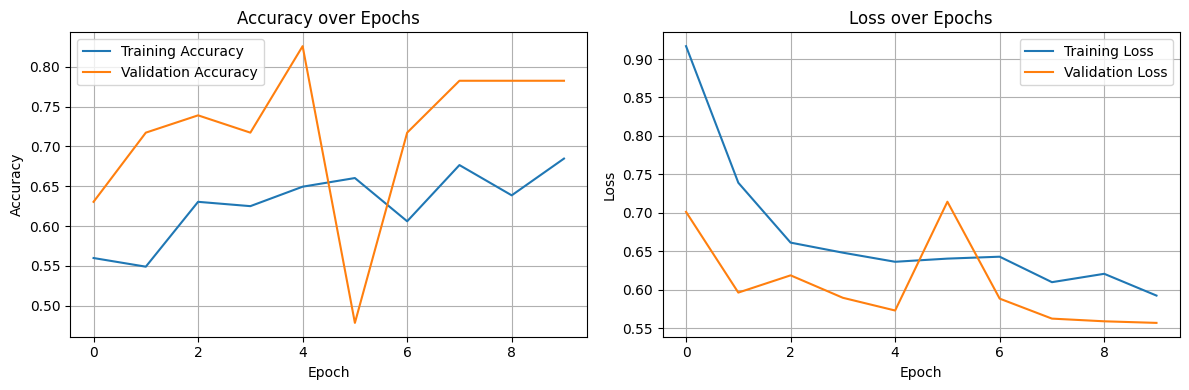

In [22]:
plt.figure(figsize=(12, 4))

# Plot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot for Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Ensures that the plots do not overlap
plt.show()


### Evaluate on the test set

In [23]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.2f}')
print(f'Test Loss: {test_loss:.2f}')

2/2 [==============================] - 0s 60ms/step - loss: 0.5032 - accuracy: 0.7826
Test Accuracy: 0.78
Test Loss: 0.50


In [24]:
# Make predictions on the test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Print classification report
print('\nClassification Report:')
print(classification_report(true_labels, predicted_labels))

2/2 [==============================] - 0s 49ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.65      0.69        17
           1       0.81      0.86      0.83        29

    accuracy                           0.78        46
   macro avg       0.77      0.75      0.76        46
weighted avg       0.78      0.78      0.78        46



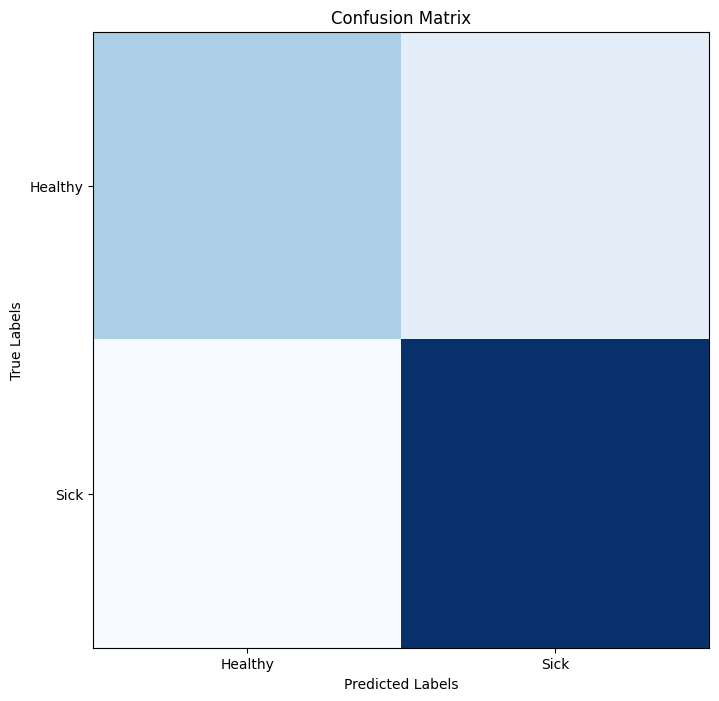

In [25]:
# Plot confusion matrix
cf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 8))
plt.imshow(cf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.xticks(np.arange(2), ['Healthy', 'Sick'])
plt.yticks(np.arange(2), ['Healthy', 'Sick'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Frågor:


### • Motivera din modell, dess arkitektur och val av relevanta hyperparametrar.

### • Har du använt någon databehandling? Varför?


### • Utvärdera modellens prestanda.

### • Är prestandan bra? Varför/ varför inte?

### • Vad hade du kunnat göra för att förbättra den ytterligare?

In [26]:
# Create a Model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(rate=0.5),
    Dense(128, activation='relu'),
    Dropout(rate=0.5),
    Dense(num_classes, activation='sigmoid')
])